<a href="https://colab.research.google.com/github/muhammadhafiz27/Preprocessing-Text/blob/main/Text_Mining_Preprocessing_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
!pip install Sastrawi

In [2]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# NLTK & Sastrawi
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download stopwords
nltk.download('stopwords', quiet=True)

True

# **Load Dataset**

In [3]:
url1 = "https://raw.githubusercontent.com/muhammadhafiz27/Preprocessing-Text/refs/heads/main/tweet_education.csv"
url2 = "https://raw.githubusercontent.com/muhammadhafiz27/Preprocessing-Text/refs/heads/main/tweet_pendidikan.csv"

df_education = pd.read_csv(url1)
df_pendidikan = pd.read_csv(url2)

print("Dataset 1 (English - tweet_education.csv):")
display(df_education.head())

print("\nDataset 2 (Indonesian - tweet_pendidikan.csv):")
display(df_pendidikan.head())


Dataset 1 (English - tweet_education.csv):


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1962228915553935570,Sun Aug 31 23:59:51 +0000 2025,1,@JebraFaushay If it weren't for her parents sh...,1962304357849850314,NaN,JebraFaushay,en,NaN,0,0,0,https://x.com/undefined/status/196230435784985...,1942319698340614144,NaN
1,1961938471863357897,Sun Aug 31 23:59:47 +0000 2025,6,@CapturedBen Who cares? We're losing. The Jews...,1962304341684998430,https://pbs.twimg.com/media/GzuBZoBWYAAQoCT.jpg,CapturedBen,en,NaN,0,0,0,https://x.com/undefined/status/196230434168499...,1950655369027411969,NaN
2,1961816435203699049,Sun Aug 31 23:59:25 +0000 2025,0,@TheChefsGardens @D567091452709 @unMaskedRogue...,1962304250593092082,NaN,TheChefsGardens,en,NaN,0,1,0,https://x.com/undefined/status/196230425059309...,1882198073168080896,NaN
3,1962167563955081356,Sun Aug 31 23:59:19 +0000 2025,0,@Dachshunds4Bern @JoshPhillipsPhD Clueless and...,1962304223707648123,NaN,Dachshunds4Bern,en,NaN,0,0,0,https://x.com/undefined/status/196230422370764...,1262937703328419840,NaN
4,1962304205122867679,Sun Aug 31 23:59:15 +0000 2025,2,From feedback to education to health we ve got...,1962304205122867679,https://pbs.twimg.com/media/GzuBRLDbIAAFYdd.jpg,NaN,en,NaN,0,0,0,https://x.com/undefined/status/196230420512286...,1572868494039060480,NaN



Dataset 2 (Indonesian - tweet_pendidikan.csv):


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1962178596489011540,Sun Aug 31 23:42:47 +0000 2025,161,@UnitBerita Sahroni : masih bisa senyum? Tentu...,1962300062182306110,NaN,UnitBerita,in,NaN,0,0,0,https://x.com/undefined/status/196230006218230...,1837274662117744640,NaN
1,1962300061775487043,Sun Aug 31 23:42:47 +0000 2025,0,Masuk polisi itu ada test psikologi gaa sih? A...,1962300061775487043,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/196230006177548...,1359221958559236096,NaN
2,1962143356236005578,Sun Aug 31 23:40:55 +0000 2025,2,@Na_risa13 @tanyarlfes Padahal pekerjaaan pend...,1962299594118979987,NaN,Na_risa13,in,NaN,0,0,0,https://x.com/undefined/status/196229959411897...,366582360,NaN
3,1962085460240699786,Sun Aug 31 23:38:47 +0000 2025,1,@Hikari_Tamagoyo @EdogawaHikari Kl Muhammadiya...,1962299056539197567,NaN,Hikari_Tamagoyo,in,NaN,0,1,0,https://x.com/undefined/status/196229905653919...,1748695610096750592,NaN
4,1962287935589580847,Sun Aug 31 23:38:21 +0000 2025,0,@iniaashaakkk tugas apa nih aayy? kebetulan ak...,1962298946686165328,NaN,iniaashaakkk,in,NaN,0,0,0,https://x.com/undefined/status/196229894668616...,3292335277,NaN


# **Fungsi Preprocessing**

## Case Folding

In [4]:
def case_folding(text: str) -> str:
    """Mengubah seluruh teks menjadi huruf kecil.

    Args:
        text (str): Teks input.

    Returns:
        str: Teks dalam huruf kecil.

    Raises:
        TypeError: Jika input bukan string.
    """
    if not isinstance(text, str):
        raise TypeError("Input harus berupa string.")
    return text.lower()


Mengubah seluruh huruf menjadi huruf kecil.

Tujuan: menyamakan format teks agar tidak ada perbedaan antara kata yang sama, misalnya “Pendidikan” dan “pendidikan”.

## Cleaning (hapus URL, mention, hashtag, emoji)

In [5]:
def clean_text(text: str) -> str:
    """Membersihkan teks dari URL, mention, hashtag, angka, tanda baca, dan emoji.

    Args:
        text (str): Teks input.

    Returns:
        str: Teks yang sudah dibersihkan.

    Raises:
        TypeError: Jika input bukan string.
    """
    if not isinstance(text, str):
        raise TypeError("Input harus berupa string.")

    # Hapus URL, mention, hashtag
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)

    # Hapus angka & tanda baca
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Hapus emoji & karakter non-ASCII
    text = re.sub(r"[^\x00-\x7F]+", " ", text)

    return text.strip()

Menghapus elemen yang tidak relevan dalam analisis teks:

*   URL : http://example.com
*   Mention : @username
*   Hashtag : #pendidikan
*   Angka, tanda baca, dan emoji

Tujuan: menjaga agar teks lebih bersih dan fokus pada kata yang bermakna.

## Tokenization

In [6]:
def tokenize_text(text: str) -> list:
    """Memecah teks menjadi token (kata per kata).

    Args:
        text (str): Teks input.

    Returns:
        list: Daftar token (kata).

    Raises:
        TypeError: Jika input bukan string.
    """
    if not isinstance(text, str):
        raise TypeError("Input harus berupa string.")
    return text.split()

Memecah teks menjadi unit-unit kata (token).

Contoh:

*   Input: "Pendidikan di Indonesia sangat penting"
*   Output: ["pendidikan", "di", "indonesia", "sangat", "penting"]

## Stopword removal

In [7]:
def remove_stopwords(tokens: list, language: str = 'english') -> list:
    """Menghapus stopwords dari daftar token.

    Args:
        tokens (list): Daftar token.
        language (str): Bahasa ('english' atau 'indonesian').

    Returns:
        list: Token tanpa stopwords.

    Raises:
        TypeError: Jika input bukan list.
        ValueError: Jika bahasa tidak didukung.
    """
    if not isinstance(tokens, list):
        raise TypeError("Input harus berupa list.")

    if language.lower() == 'english':
        stop_words = set(stopwords.words('english'))
    elif language.lower() == 'indonesian':
        stop_words = set(stopwords.words('indonesian'))
    else:
        raise ValueError("Bahasa tidak didukung. Pilih 'english' atau 'indonesian'.")

    return [token for token in tokens if token not in stop_words]


Menghapus kata-kata umum yang tidak memiliki makna signifikan dalam analisis (stopwords).

Contoh stopwords:

*   Bahasa Indonesia → “yang, dan, di, ke”
*   Bahasa Inggris → “the, is, and, at”

Tujuan: meningkatkan fokus pada kata yang benar-benar bermakna.

## Stemming

In [8]:
def stem_tokens(tokens: list, language: str = 'english') -> list:
    """Mengubah token menjadi bentuk dasar (stemming).

    Args:
        tokens (list): Daftar token.
        language (str): Bahasa ('english' atau 'indonesian').

    Returns:
        list: Token hasil stemming.

    Raises:
        TypeError: Jika input bukan list.
        ValueError: Jika bahasa tidak didukung.
    """
    if not isinstance(tokens, list):
        raise TypeError("Input harus berupa list.")

    if language.lower() == 'english':
        stemmer = PorterStemmer()
        return [stemmer.stem(token) for token in tokens]
    elif language.lower() == 'indonesian':
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        return [stemmer.stem(token) for token in tokens]
    else:
        raise ValueError("Bahasa tidak didukung. Pilih 'english' atau 'indonesian'.")


Mengembalikan kata ke bentuk dasarnya.

*   Bahasa Indonesia: Sastrawi Stemmer
*   Bahasa Inggris: Porter Stemmer

## Normalisasi kata tidak baku

In [9]:
def normalize_tokens(tokens: list, language: str = 'english') -> list:
    """Melakukan normalisasi kata tidak baku atau singkatan.

    Args:
        tokens (list): Daftar token.
        language (str): Bahasa ('english' atau 'indonesian').

    Returns:
        list: Token hasil normalisasi.

    Raises:
        TypeError: Jika input bukan list.
        ValueError: Jika bahasa tidak didukung.
    """
    if not isinstance(tokens, list):
        raise TypeError("Input harus berupa list.")

    # Minimal 20 kata untuk masing-masing bahasa
    english_informal_dict = {
        'gonna': 'going to', 'wanna': 'want to', 'btw': 'by the way',
        'lol': 'laughing out loud', 'brb': 'be right back', 'imo': 'in my opinion',
        'irl': 'in real life', 'lmao': 'laughing my ass off', 'rofl': 'rolling on floor laughing',
        'afaik': 'as far as I know', 'asap': 'as soon as possible', 'fyi': 'for your information',
        'idk': 'i do not know', 'ikr': 'i know right', 'nvm': 'never mind',
        'omg': 'oh my god', 'tbh': 'to be honest', 'tmi': 'too much information',
        'yolo': 'you only live once', 'wyd': 'what are you doing', 'hbu': 'how about you',
        'iykyk': 'if you know you know', 'smh': 'shaking my head', 'ftw': 'for the win',
        'bae': 'before anyone else', 'lit': 'amazing', 'salty': 'bitter',
        'basic': 'unoriginal', 'cringe': 'embarrassing', 'sus': 'suspicious'
    }

    indonesian_informal_dict = {
        'bgt': 'banget', 'gak': 'tidak', 'udah': 'sudah',
        'bkn': 'bukan', 'jd': 'jadi', 'yg': 'yang',
        'dr': 'dari', 'sm': 'sama', 'tp': 'tapi',
        'klo': 'kalau', 'gpp': 'tidak apa-apa', 'btw': 'omong-omong',
        'dlm': 'dalam', 'dgn': 'dengan', 'utk': 'untuk',
        'krn': 'karena', 'shg': 'sehingga', 'pd': 'pada',
        'jg': 'juga', 'sdh': 'sudah', 'tdk': 'tidak',
        'mrk': 'mereka', 'ttg': 'tentang', 'sbg': 'sebagai',
        'bbrp': 'beberapa', 'dll': 'dan lain-lain', 'cb': 'coba',
        'trs': 'terus', 'gtu': 'gitu', 'aja': 'saja'
    }

    if language.lower() == 'english':
        normalization_dict = english_informal_dict
    elif language.lower() == 'indonesian':
        normalization_dict = indonesian_informal_dict
    else:
        raise ValueError("Bahasa tidak didukung. Pilih 'english' atau 'indonesian'.")

    return [normalization_dict.get(token, token) for token in tokens]

Mengubah kata tidak baku, singkatan, atau bahasa gaul menjadi bentuk baku. Minimal 20 kata untuk masing-masing bahasa sudah ditambahkan ke dalam kamus normalisasi.

Contoh:

*   Indonesia: “gak” -> “tidak”, “yg” -> “yang”
*   Inggris: “btw” -> “by the way”, “idk” -> “i do not know”

Tujuan: membuat kata-kata lebih konsisten dan sesuai standar bahasa.

# **Eksekusi Preprocessing**

In [10]:
def preprocess_text(text: str, language: str = 'english') -> list:
    """Pipeline preprocessing teks lengkap.

    Tahapan:
        1. Case folding
        2. Cleaning
        3. Tokenisasi
        4. Stopword removal
        5. Stemming
        6. Normalisasi

    Args:
        text (str): Teks input.
        language (str): Bahasa teks ('english' atau 'indonesian').

    Returns:
        list: Token hasil preprocessing.
    """
    try:
        text = case_folding(text)
        text = clean_text(text)
        tokens = tokenize_text(text)
        tokens = remove_stopwords(tokens, language=language)
        tokens = stem_tokens(tokens, language=language)
        tokens = normalize_tokens(tokens, language=language)
        return tokens
    except Exception as e:
        print(f"Terjadi error saat memproses teks: {text[:50]}...")
        print(f"Detail error: {e}")
        return []

In [11]:
print("\nMemproses dataset bahasa Inggris...")
df_education['processed_text'] = df_education['full_text'].apply(
    lambda x: preprocess_text(x, language='english'))

print("Memproses dataset bahasa Indonesia...")
df_pendidikan['processed_text'] = df_pendidikan['full_text'].apply(
    lambda x: preprocess_text(x, language='indonesian'))

print("\nHasil dataset bahasa Inggris:")
display(df_education[['full_text', 'processed_text']].head())

print("\nHasil dataset bahasa Indonesia:")
display(df_pendidikan[['full_text', 'processed_text']].head())


Memproses dataset bahasa Inggris...
Memproses dataset bahasa Indonesia...

Hasil dataset bahasa Inggris:


,full_text,processed_text
0,@JebraFaushay If it weren't for her parents sh...,"[werent, parent, wouldnt, shame, fed, cloth, a..."
1,@CapturedBen Who cares? We're losing. The Jews...,"[care, lose, jew, still, amp, rule, govern, ed..."
2,@TheChefsGardens @D567091452709 @unMaskedRogue...,"[absolut, unoriginal, understand, thing, like,..."
3,@Dachshunds4Bern @JoshPhillipsPhD Clueless and...,"[clueless, unmoor, realiti, look, greedi, corp..."
4,From feedback to education to health we ve got...,"[feedback, educ, health, got, templat, everi, ..."



Hasil dataset bahasa Indonesia:


,full_text,processed_text
0,@UnitBerita Sahroni : masih bisa senyum? Tentu...,"[sahroni, senyum, harap, sedih, malu, liat, ni..."
1,Masuk polisi itu ada test psikologi gaa sih? A...,"[masuk, polisi, test, psikologi, gaa, sih, did..."
2,@Na_risa13 @tanyarlfes Padahal pekerjaaan pend...,"[pekerjaaan, didik, sehat, pengaruh, politik, ..."
3,@Hikari_Tamagoyo @EdogawaHikari Kl Muhammadiya...,"[kl, muhammadiyah, msh, bain, kak, ormas, yang..."
4,@iniaashaakkk tugas apa nih aayy? kebetulan ak...,"[tugas, nih, aayy, beberapa, tim, dengan, back..."


# **Visualisasi**

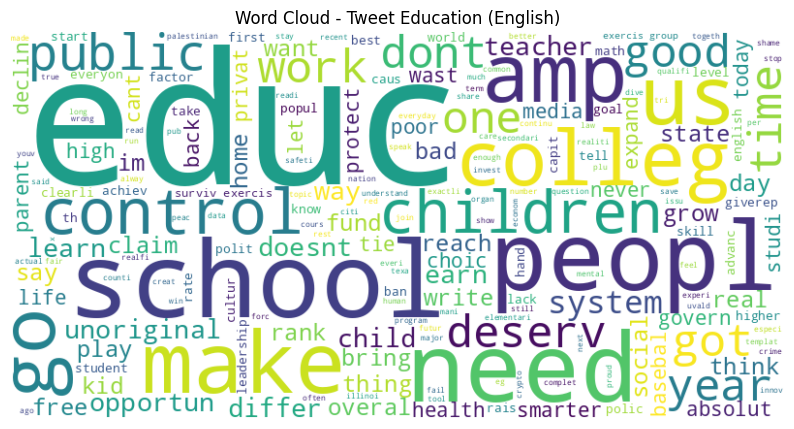

/tmp/ipython-input-3053733989.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in top_words],


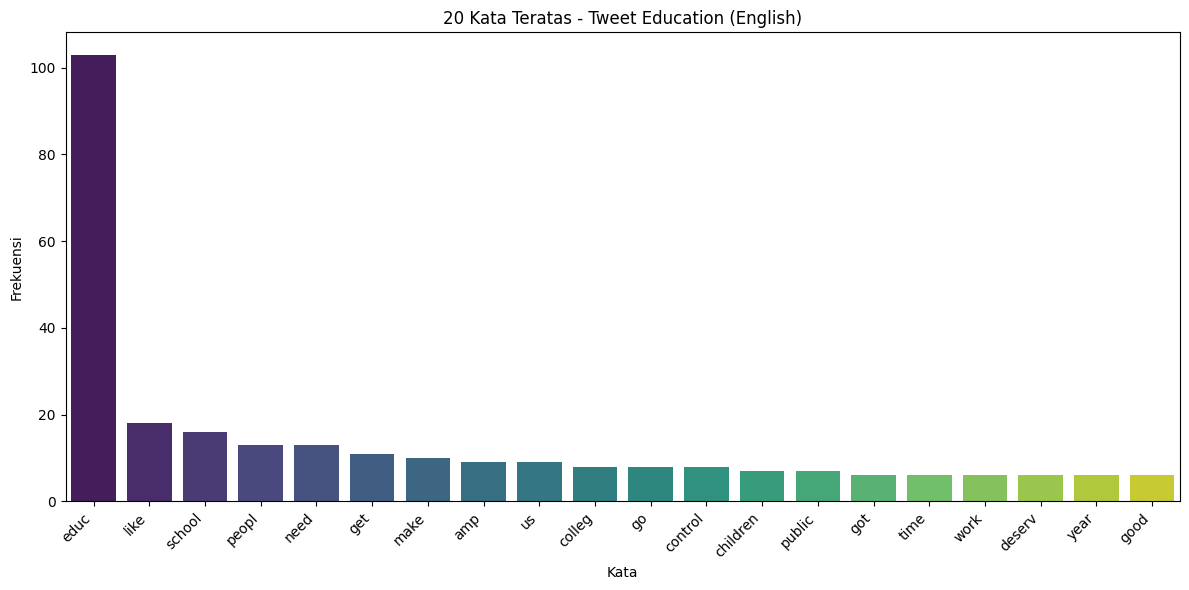

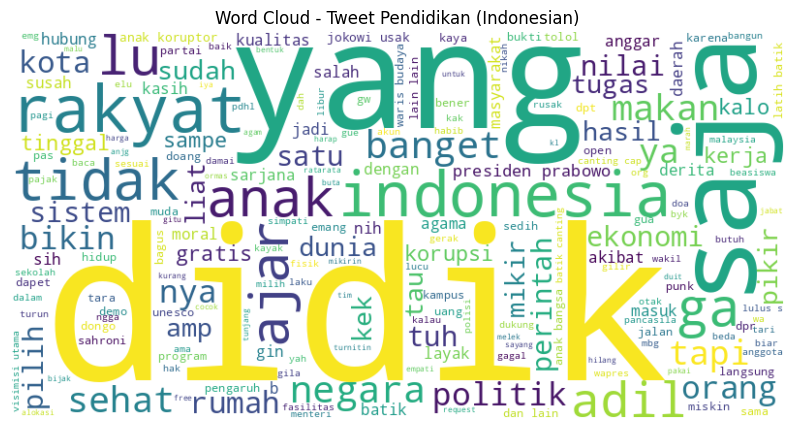

/tmp/ipython-input-3053733989.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in top_words],


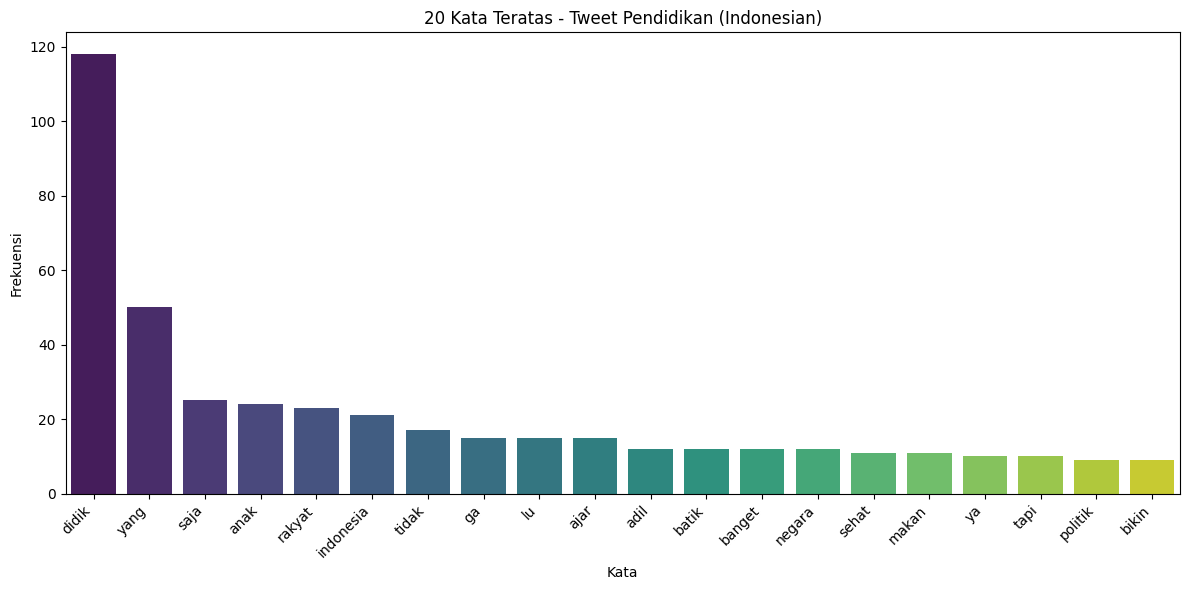

In [12]:
def visualize_processed_text(df: pd.DataFrame, title: str):
    """Membuat visualisasi hasil preprocessing berupa word cloud dan plot frekuensi kata.

    Args:
        df (pd.DataFrame): DataFrame yang memiliki kolom 'processed_text'.
        title (str): Judul visualisasi.
    """
    all_tokens = [token for sublist in df['processed_text'] for token in sublist]
    text = " ".join(all_tokens)

    # Word Cloud
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap='viridis').generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud - {title}')
    plt.show()

    # Plot Frekuensi
    fdist = Counter(all_tokens)
    top_words = fdist.most_common(20)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=[word[0] for word in top_words],
                y=[word[1] for word in top_words], palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'20 Kata Teratas - {title}')
    plt.xlabel('Kata')
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()


# Menampilkan visualisasi
visualize_processed_text(df_education, "Tweet Education (English)")
visualize_processed_text(df_pendidikan, "Tweet Pendidikan (Indonesian)")